# Tesla Stock Anomaly Detection & Pump & Dump Analysis 

## **Project Overview**
This project investigates **unusual stock price movements** in Tesla ($TSLA) and identifies potential **Pump & Dump patterns** using **Python, Pandas, Matplotlib, and Machine Learning models**.

### **Objectives:**
- **Analyze historical Tesla stock prices** to detect **abnormal price jumps or crashes**.
- **Identify unusual volume spikes** that might indicate coordinated **market manipulation**.
- **Use data visualization & statistical models** to find patterns in stock movements.
- **Cross-check findings with news & social media data** for validation.

---

## **Step 1: Fetching Tesla Stock Data**
- **Source:** Yahoo Finance API
- **Goal:** Collect historical Tesla stock data (Daily Close, High, Low, Open, Volume).
- **Method:** Python’s `yfinance` library.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock ticker symbol
ticker = "TSLA"  # Tesla stock

# Fetch stock data for the past 1 year (daily interval)
stock_data = yf.download(ticker, period="1y", interval="1d")

# Display the first 5 rows
print(stock_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-03-15  163.570007  165.179993  160.759995  163.160004   96971900
2024-03-18  173.800003  174.720001  165.899994  170.020004  108214400
2024-03-19  171.320007  172.820007  167.419998  172.360001   77271400
2024-03-20  175.660004  176.250000  170.820007  173.000000   83846700
2024-03-21  172.820007  178.179993  171.800003  176.389999   73178000


In [2]:
# Save the stock data to a CSV file
stock_data.to_csv("tesla_stock_data.csv")

print("Stock data saved successfully!")


Stock data saved successfully!


# **Step 2: Load and Explore the Data**

#### **Goal**: Understand dataset structure, check missing values, and inspect basic trends.

In [3]:
import pandas as pd

# Reload the saved data (fixing the issue)
df = pd.read_csv("tesla_stock_data.csv")

# Display dataset info
df.info()

# Show summary statistics
df.describe()

# Check column names
print(df.columns)  # Print column names to see if 'Date' is present




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   252 non-null    object
 1   Close   251 non-null    object
 2   High    251 non-null    object
 3   Low     251 non-null    object
 4   Open    251 non-null    object
 5   Volume  251 non-null    object
dtypes: object(6)
memory usage: 11.9+ KB
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [4]:
import pandas as pd

# Reload CSV while skipping extra metadata rows
df = pd.read_csv("tesla_stock_data.csv", skiprows=2, index_col=0, parse_dates=True)

# Rename columns properly
df.columns = ["Close", "High", "Low", "Open", "Volume"]

# Drop any remaining NaN rows (caused by extra rows)
df = df.dropna()

# Display the first few rows
print(df.head())


                 Close        High         Low        Open     Volume
Date                                                                 
2024-03-15  163.570007  165.179993  160.759995  163.160004   96971900
2024-03-18  173.800003  174.720001  165.899994  170.020004  108214400
2024-03-19  171.320007  172.820007  167.419998  172.360001   77271400
2024-03-20  175.660004  176.250000  170.820007  173.000000   83846700
2024-03-21  172.820007  178.179993  171.800003  176.389999   73178000


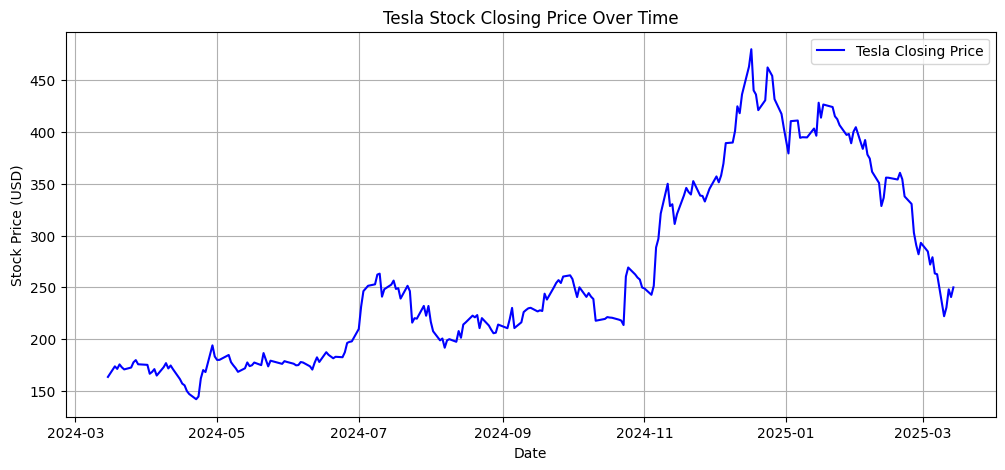

In [5]:
import matplotlib.pyplot as plt

# Plot Tesla's closing price trend
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Tesla Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


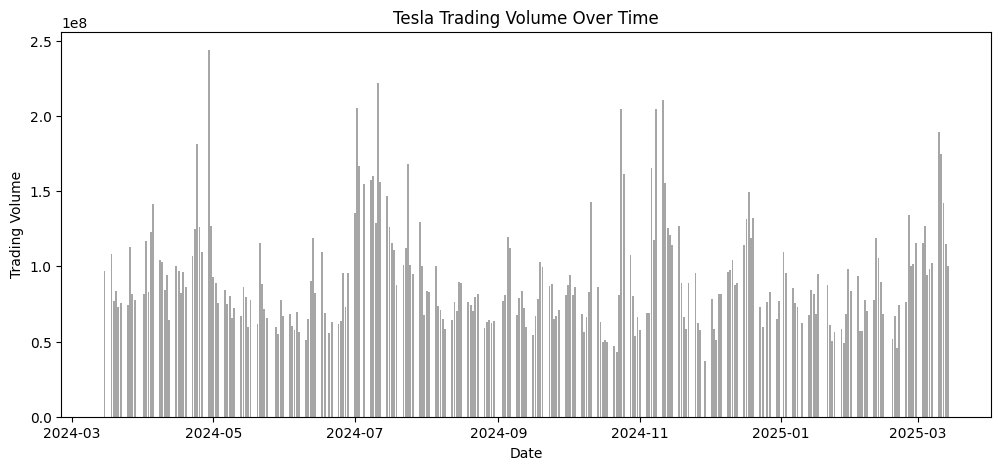

In [6]:
# Plot Tesla's trading volume
plt.figure(figsize=(12,5))
plt.bar(df.index, df["Volume"], color="gray", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Tesla Trading Volume Over Time")
plt.show()


# **Step 3: Detecting Anomalies in Tesla Stock Prices** 

## **3.1 Identify Unusual Trading Volume Spikes**

##### **Pump & Dump events** involve abnormal volume increases.
#### **Approach**: Calculate **mean & standard deviation** of volume, then flag anomalies.

In [7]:
import numpy as np

# Compute average & standard deviation of trading volume
avg_volume = df["Volume"].mean()
std_volume = df["Volume"].std()

# Define threshold (2 standard deviations above mean)
volume_threshold = avg_volume + (2 * std_volume)

# Identify days with unusually high trading volume
df["Volume_Anomaly"] = df["Volume"] > volume_threshold

# Display days with volume anomalies
df[df["Volume_Anomaly"]]


,Close,High,Low,Open,Volume,Volume_Anomaly
Date,,,,,,
2024-04-24,162.130005,167.970001,157.509995,162.839996,181178000,True
2024-04-29,194.050003,198.869995,184.539993,188.419998,243869700,True
2024-07-02,231.259995,231.300003,218.059998,218.889999,205047900,True
2024-07-03,246.389999,248.350006,234.250000,234.559998,166561500,True
2024-07-11,241.029999,271.000000,239.649994,263.299988,221707300,True
2024-07-24,215.990005,225.990005,214.710007,225.419998,167942900,True
2024-10-24,260.480011,262.119995,242.649994,244.679993,204491900,True
2024-10-25,269.190002,269.489990,255.320007,256.010010,161611900,True
2024-11-06,288.529999,289.589996,275.619995,284.670013,165228700,True


## **3.2 Identify Unusual Price Movements**
#### Find days where Tesla’s price changed **by more than 5% in one day.**
#### **Approach**: Compute daily percentage change and flag outliers.

In [8]:
# Calculate daily % change in closing price
df["Price_Change"] = df["Close"].pct_change() * 100

# Define threshold for extreme price movements (greater than 5% change)
df["Price_Anomaly"] = abs(df["Price_Change"]) > 5

# Display days with price anomalies
df[df["Price_Anomaly"]]

,Close,High,Low,Open,Volume,Volume_Anomaly,Price_Change,Price_Anomaly
Date,,,,,,,,
2024-03-18,173.800003,174.720001,165.899994,170.020004,108214400,False,6.254200,True
2024-04-15,161.479996,170.690002,161.380005,170.240005,100245300,False,-5.594859,True
2024-04-24,162.130005,167.970001,157.509995,162.839996,181178000,True,12.061109,True
2024-04-29,194.050003,198.869995,184.539993,188.419998,243869700,True,15.306917,True
2024-04-30,183.279999,190.949997,182.839996,186.979996,127031800,False,-5.550118,True
2024-05-21,186.600006,186.880005,174.710007,175.509995,115266500,False,6.659051,True
2024-06-17,187.440002,188.809998,177.000000,177.919998,109786100,False,5.297460,True
2024-07-01,209.860001,213.229996,200.850006,201.020004,135691400,False,6.054172,True
2024-07-02,231.259995,231.300003,218.059998,218.889999,205047900,True,10.197271,True


# **Step 4: Visualizing Price & Volume Anomalies**
## **4.1 Plot Tesla's Price Anomalies**

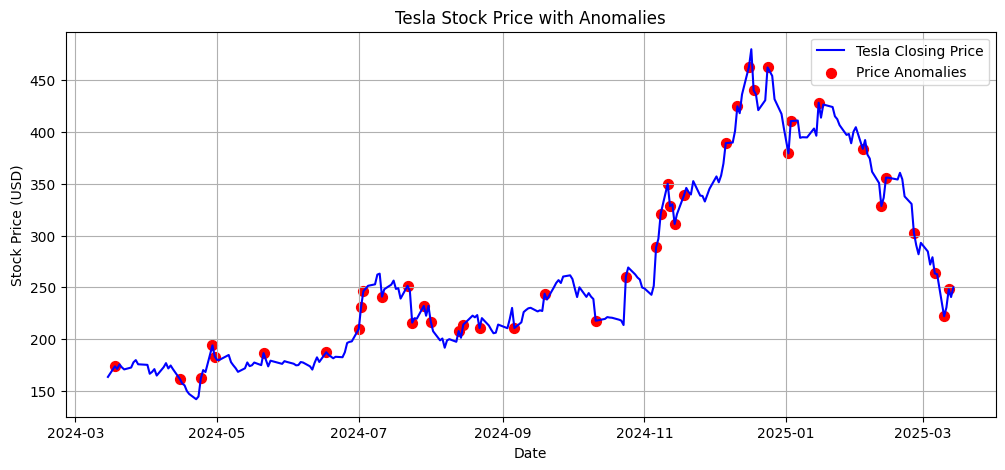

Image saved successfully as tesla_stock_anomalies.png!


In [9]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12,5))

# Plot closing price
plt.plot(df.index, df["Close"], label="Tesla Closing Price", color="blue")

# Highlight anomaly points
plt.scatter(df[df["Price_Anomaly"]].index, df[df["Price_Anomaly"]]["Close"], 
            color="red", label="Price Anomalies", s=50)

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with Anomalies")
plt.legend()
plt.grid()

# Save the figure **before showing**
plt.savefig("tesla_stock_anomalies.png", dpi=300, bbox_inches='tight')

# Show the plot after saving
plt.show()

print("Image saved successfully as tesla_stock_anomalies.png!")


## **4.2 Plot Tesla's Trading Volume Anomalies**

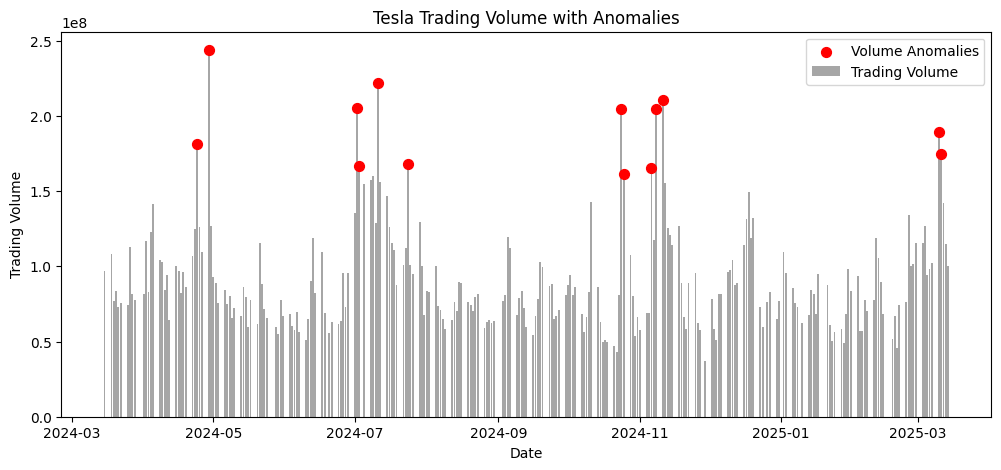

In [10]:
# Plot Tesla's trading volume with anomalies
plt.figure(figsize=(12,5))

# Plot trading volume
plt.bar(df.index, df["Volume"], color="gray", alpha=0.7, label="Trading Volume")

# Highlight days with volume anomalies
plt.scatter(df[df["Volume_Anomaly"]].index, df[df["Volume_Anomaly"]]["Volume"], 
            color="red", label="Volume Anomalies", s=50)

plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Tesla Trading Volume with Anomalies")
plt.legend()

# Save the figure **before showing**
plt.savefig("tesla_volume_anomalies.png", dpi=300, bbox_inches='tight')

# Show the plot after saving
plt.show()


# **Step 5: Identifying Pump & Dump Events**

## **5.1 Combine Price & Volume Anomalies**

In [11]:
# Filter only anomaly days
anomaly_days = df[(df["Price_Anomaly"]) | (df["Volume_Anomaly"])].copy()

# Add a new column for price anomaly type
anomaly_days["Price_Anomaly_Type"] = "No Price Anomaly"  # Default value

# Label Pump & Dump (both price and volume anomalies)
anomaly_days.loc[anomaly_days["Price_Anomaly"] & anomaly_days["Volume_Anomaly"], "Price_Anomaly_Type"] = "Pump & Dump"

# Label Price Spike (only price anomaly, no volume anomaly)
anomaly_days.loc[anomaly_days["Price_Anomaly"] & ~anomaly_days["Volume_Anomaly"], "Price_Anomaly_Type"] = "Price Spike"

# Add a new column for volume anomaly type
anomaly_days["Volume_Anomaly_Type"] = "No Volume Anomaly"  # Default value

# Show relevant columns
anomaly_days[["Close", "Volume", "Price_Anomaly", "Volume_Anomaly", "Price_Anomaly_Type"]]


,Close,Volume,Price_Anomaly,Volume_Anomaly,Price_Anomaly_Type
Date,,,,,
2024-03-18,173.800003,108214400,True,False,Price Spike
2024-04-15,161.479996,100245300,True,False,Price Spike
2024-04-24,162.130005,181178000,True,True,Pump & Dump
2024-04-29,194.050003,243869700,True,True,Pump & Dump
2024-04-30,183.279999,127031800,True,False,Price Spike
2024-05-21,186.600006,115266500,True,False,Price Spike
2024-06-17,187.440002,109786100,True,False,Price Spike
2024-07-01,209.860001,135691400,True,False,Price Spike
2024-07-02,231.259995,205047900,True,True,Pump & Dump


# **Step 6: Analyzing Major Events**
## **6.1 Count Pump & Dump Events**

In [12]:
# Count the number of each anomaly type
anomaly_counts = anomaly_days["Price_Anomaly_Type"].value_counts()

print(anomaly_counts)

Price_Anomaly_Type
Price Spike         32
Pump & Dump         11
No Price Anomaly     2
Name: count, dtype: int64


## **6.2 Find Biggest Pump & Dump**

In [13]:
# Filter only Pump & Dump days
pump_dump_days = anomaly_days[anomaly_days["Price_Anomaly_Type"] == "Pump & Dump"]

# Find the biggest price increase
biggest_pump = pump_dump_days.loc[pump_dump_days["Price_Change"].idxmax()]

print("Biggest Pump & Dump Event:")
print(biggest_pump[["Close", "Volume", "Price_Change"]])


Biggest Pump & Dump Event:
Close           260.480011
Volume           204491900
Price_Change     21.919035
Name: 2024-10-24 00:00:00, dtype: object


## **6.3 Find Biggest Price Drop**

In [14]:
# Filter only Price Spike days
price_spike_days = anomaly_days[anomaly_days["Price_Anomaly_Type"] == "Price Spike"]

# Find the biggest price drop
biggest_crash = price_spike_days.loc[price_spike_days["Price_Change"].idxmin()]

print("Biggest Price Spike (Drop):")
print(biggest_crash[["Close", "Volume", "Price_Change"]])


Biggest Price Spike (Drop):
Close           217.800003
Volume           142628900
Price_Change     -8.782511
Name: 2024-10-11 00:00:00, dtype: object


# **Step 7: External News Validation**

## Tesla Stock Anomaly Analysis - October 2024 

### October 11, 2024: **Biggest Price Drop (-8.78%)**
- Tesla stock fell **8.78%** to **$217.80**.
- The drop occurred after Tesla unveiled **Cybercab (robotaxi), Robovan, and the Optimus humanoid robot**.
- Investor sentiment was **negative**, leading to a **6% premarket fall**.
- **Source:** [Investopedia](https://www.investopedia.com/5-things-to-know-before-the-stock-market-opens-october-11-2024-8726916?utm_source=chatgpt.com)

### October 24, 2024: **Biggest Price Surge (+21.92%)**
- Tesla stock jumped **21.92%** to **$260.48**.
- The surge was driven by **better-than-expected earnings and plans for an affordable vehicle in 2025**.
- This was **Tesla’s best single-day gain in over a decade**.
- **Source:** [Investopedia](https://www.investopedia.com/tesla-stock-on-track-for-best-day-in-a-decade-8733864?utm_source=chatgpt.com)




# Takeaways

- **No clear signs of Pump & Dump manipulation.**
- The **biggest anomalies** were driven by **company events, earnings, and product announcements.**
- Tesla’s stock **remains highly reactive to news and investor sentiment**.

Further analysis required: Social Media Sentiment + Market Reactions.

---
**Next Steps:**  
✅ Cross-check these findings with **social media sentiment** (Twitter/X, Reddit).  
✅ Compare Tesla's price changes to **overall market trends (S&P 500, Nasdaq).**  
✅ Investigate if similar events happened **in previous earnings cycles**.

In [15]:
# Save dataset for Tableau
anomaly_days.to_csv("Tesla_Stock_Anomalies_Tableau.csv", index=True)

print("File saved for Tableau!")

File saved for Tableau!
